In [2]:
import pandas

In [3]:
df = pandas.read_excel('euro.xlsx')

In [4]:
df.head()

,nominal,data,curs,cdx
0,1,2017-01-10,63.1125,Евро
1,1,2017-01-11,63.5445,Евро
2,1,2017-01-12,63.5184,Евро
3,1,2017-01-13,63.2759,Евро
4,1,2017-01-14,63.1222,Евро


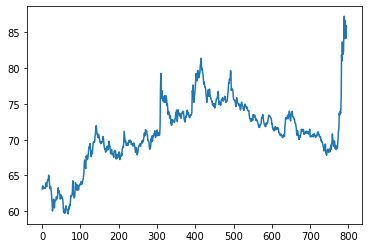

In [5]:
df.curs.plot()

In [6]:
money = df.curs

In [7]:
past = 4 * 7 # 4 недели из прошлого
future = 7 # 7 дней из будущего

start = past
end = len(money) - future

In [8]:
start

28

In [9]:
end

789

In [10]:
end - start

761

In [11]:
new_df = []
for i in range(start, end):
    all_days = money[(i - past):(i + future)]
    new_df.append(list(all_days))

In [12]:
past_columns = []
for i in range(past):
    past_columns.append(f'past_{i}')

In [13]:
future_columns = []
for i in range(future):
    future_columns.append(f'future_{i}')

In [14]:
transformed_df = pandas.DataFrame(new_df, columns=(past_columns + future_columns))

In [15]:
# Учебник, обучение модели
x = transformed_df[past_columns][:-1] # то, на основании чего модель будет делать предсказание
y = transformed_df[future_columns][:-1] # то, что модель будеть предсказывать

In [16]:
# Экзамен
x_test = transformed_df[past_columns][-1:] # то, на основании чего модель будет делать предсказание
y_test = transformed_df[future_columns][-1:] # то, что модель будеть предсказывать

In [17]:
# Задача регрессии (по одним числам пердсказать другие)
from sklearn.linear_model import LinearRegression

In [18]:
LinReg = LinearRegression()

In [19]:
LinReg.fit(x,y) #обучение

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
prediction = LinReg.predict(x_test)

In [21]:
prediction

array([[82.57769623, 82.39024269, 83.13916605, 83.1770853 , 83.12483456,
        83.18867753, 83.35461061]])

In [22]:
y_test

,future_0,future_1,future_2,future_3,future_4,future_5,future_6
760,84.8881,87.2669,84.1552,86.705,85.4253,84.1485,85.9648


In [23]:
import matplotlib.pyplot as plt

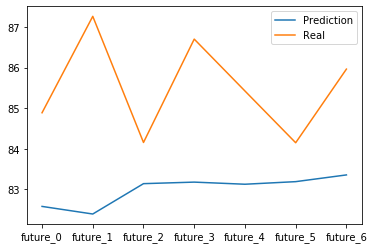

In [24]:
plt.plot(prediction[0], label='Prediction')
plt.plot(y_test.iloc[0], label='Real')
plt.legend()

In [25]:
from sklearn.metrics import mean_absolute_error

In [26]:
mean_absolute_error(prediction[0], y_test.iloc[0])

2.514498147364498

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [28]:
KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(x, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

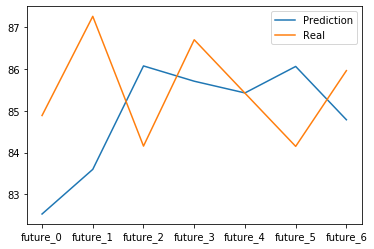

In [29]:
prediction = KNN.predict(x_test)
plt.plot(prediction[0], label='Prediction')
plt.plot(y_test.iloc[0], label='Real')
plt.legend()

In [30]:
mean_absolute_error(prediction[0], y_test.iloc[0])

1.7210571428571424

In [31]:
from sklearn.neural_network import MLPRegressor

In [32]:
MLP = MLPRegressor(random_state = 42, max_iter= 1000, hidden_layer_sizes=(30, 60, 60))
MLP.fit(x, y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(30, 60, 60), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

2.478738036618527

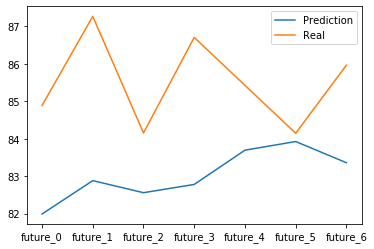

In [33]:
prediction = MLP.predict(x_test)
plt.plot(prediction[0], label='Prediction')
plt.plot(y_test.iloc[0], label='Real')
plt.legend()
mean_absolute_error(prediction[0], y_test.iloc[0])

In [34]:
mean_absolute_error(prediction[0], y_test.iloc[0])

2.478738036618527

In [35]:
from sklearn.linear_model import Ridge

In [36]:
RID = Ridge(alpha= 2.5)
RID.fit(x, y)

Ridge(alpha=2.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

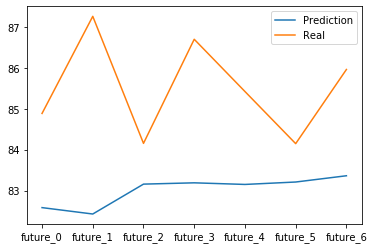

In [37]:
prediction = RID.predict(x_test)
plt.plot(prediction[0], label='Prediction')
plt.plot(y_test.iloc[0], label='Real')
plt.legend()

In [38]:
mean_absolute_error(prediction[0], y_test.iloc[0])

2.4977213365739885

In [39]:
from sklearn.dummy import DummyRegressor

In [40]:
dm = DummyRegressor()
dm.fit(x, y)

DummyRegressor(constant=None, quantile=None, strategy='mean')

<function matplotlib.pyplot.legend(*args, **kwargs)>

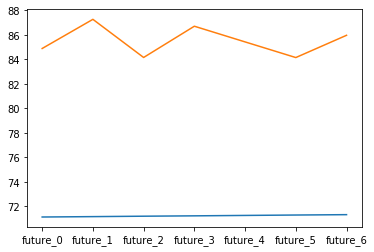

In [41]:
prediction = dm.predict(x_test)
plt.plot(prediction[0], label='Prediction')
plt.plot(y_test.iloc[0], label='Real')
plt.legend

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
rfr = RandomForestRegressor()
rfr.fit(x, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

<function matplotlib.pyplot.legend(*args, **kwargs)>

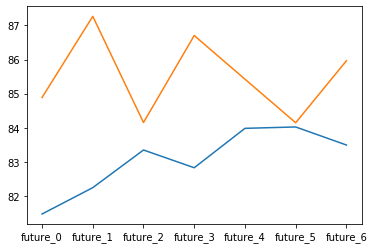

In [44]:
prediction = rfr.predict(x_test)
plt.plot(prediction[0], label='Prediction')
plt.plot(y_test.iloc[0], label='Real')
plt.legend

In [45]:
mean_absolute_error(prediction[0], y_test.iloc[0])

2.4494751428571755

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
RFR = RandomForestRegressor()

In [48]:
RFR

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
paramGrid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [2, 5, 10]
}

In [50]:
GS = GridSearchCV(RFR, paramGrid, scoring = 'neg_mean_absolute_error', cv = 4, n_jobs = 4)

In [51]:
GS.fit(x, y)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [52]:
GS.best_params_

{'max_depth': 5, 'n_estimators': 500}

In [53]:
GS.best_score_

-1.9395412098756295

In [54]:
bestModel = GS.best_estimator_

In [55]:
prediction = bestModel.predict(x_test)

In [56]:
prediction

array([[81.78343879, 82.55106321, 83.69276778, 83.42745659, 84.35829155,
        84.35743746, 83.96545743]])

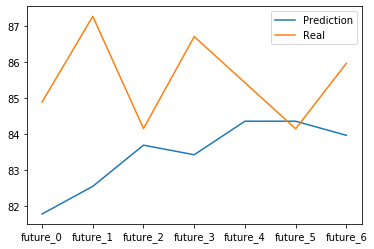

In [57]:
plt.plot(prediction[0], label='Prediction')
plt.plot(y_test.iloc[0], label='Real')
plt.legend()

In [58]:
mean_absolute_error(prediction[0], y_test.iloc[0])

2.1193945855241867

In [59]:
df.tail()

,nominal,data,curs,cdx
791,1,2020-03-24,86.7050,Евро
792,1,2020-03-25,85.4253,Евро
793,1,2020-03-26,84.1485,Евро
794,1,2020-03-27,85.9648,Евро
795,1,2020-03-28,85.7389,Евро
